# Similar to Numpy but with Strong GPU Acceleration

## Tensors

In [1]:
import torch
import numpy 

In [2]:
numpy.array([[0.1, 1.2], [2.2, 3.1], [4.9, 5.2]])

array([[0.1, 1.2],
       [2.2, 3.1],
       [4.9, 5.2]])

In [3]:
torch.tensor([[0.1, 1.2], [2.2, 3.1], [4.9, 5.2]])

tensor([[0.1000, 1.2000],
        [2.2000, 3.1000],
        [4.9000, 5.2000]])

In [4]:
w = torch.empty(3, 3)
print(w,'\n', w.shape, '\n')

tensor([[ 4.5962e+30,  4.5859e-41, -3.8167e+25],
        [ 3.0869e-41,  4.4842e-44,  0.0000e+00],
        [ 8.9683e-44,  0.0000e+00,  0.0000e+00]]) 
 torch.Size([3, 3]) 



In [5]:
x = torch.randn(3, 3, 7)
print(x,'\n', x.shape, '\n')

tensor([[[-1.4742,  0.1165, -0.3412, -0.0250, -0.8539,  0.0509,  0.4772],
         [ 0.1429,  1.3536, -0.1055,  1.1249,  0.4445, -0.2266,  1.9925],
         [ 0.1771, -0.1769, -2.2670,  0.2276, -0.3738, -2.0050,  0.3408]],

        [[ 2.3635, -0.5119, -0.4414, -0.2478, -0.3434, -0.9072,  0.1397],
         [ 1.1955,  0.0122, -1.0390,  0.1517,  0.1579, -1.7057, -0.6596],
         [ 0.0626, -2.4305, -2.2686,  0.8591, -1.2860, -1.3877,  0.1962]],

        [[-1.2822,  1.3204, -0.9230,  1.6608,  1.0434, -0.2000,  0.5733],
         [-0.1559, -0.1259,  1.2931, -0.7992,  0.0842, -1.6175,  0.4819],
         [ 0.1514, -0.2215, -0.3729,  0.0473,  1.8932,  0.4817,  2.1359]]]) 
 torch.Size([3, 3, 7]) 



In [6]:
y = torch.zeros(3, 3)
print(y,'\n', y.shape, '\n')

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]) 
 torch.Size([3, 3]) 



In [7]:
z = torch.ones(3, 3)
print(z,'\n', z.shape, '\n')

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]) 
 torch.Size([3, 3]) 



## Shape and View


In [8]:
x = torch.rand(100,50)
print(x.shape)

torch.Size([100, 50])


In [9]:
y=x.view(20,5,50)
print(y.shape)

torch.Size([20, 5, 50])


In [10]:
z=x.view(-1,5,50)
print(z.shape)

torch.Size([20, 5, 50])


# Tensors in CPU and GPU

In [11]:
cpu=torch.device("cpu")
gpu=torch.device("cuda:0") # GPU 0

# Create tensor with CPU
x=torch.ones(3,3, device=cpu)
print("CPU:",x.device)

x=torch.ones(3,3, device=gpu)
print("GPU:",x.device)

x=torch.ones(3,3).cuda(0)
print("CPU to GPU:",x.device)

x=torch.ones(3,3, device=gpu).cpu()
print("GPU to CPU:",x.device)

CPU: cpu
GPU: cuda:0
CPU to GPU: cuda:0
GPU to CPU: cpu


In [12]:
x=torch.rand(10000,10000)
y=torch.rand(10000,10000)

Time in CPU

In [13]:
import time 

t = time.time()
z=x@y
t = time.time()-t
print(t)

4.188493967056274


Time in GPU

In [14]:
xc=x.cuda(0)
yc=y.cuda(0)
t = time.time()
z=xc@yc
t = time.time()-t
print(t)

0.013956308364868164


# Numpy to PyTorch

In [16]:
import numpy as np 

a = np.ones(5)
#From NumPy to Torch
b = torch.from_numpy(a)
print('a:',a)
print('b:',b)

a: [1. 1. 1. 1. 1.]
b: tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


# PyTorch's Autograd

In [17]:
x = torch.arange(4.).view(4,1)
x.requires_grad=True
print('x^T =',x.t())

y=0.5*x.t()@x

y.backward()
x.grad

x^T = tensor([[0., 1., 2., 3.]], grad_fn=<TBackward>)


tensor([[0.],
        [1.],
        [2.],
        [3.]])

# Example

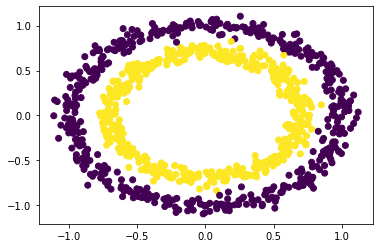

In [18]:
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
dat, lbs = datasets.make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=True, factor=0.7)

plt.scatter(dat[:,0], dat[:,1], c=lbs)

In [19]:
import torch.nn as nn
import torch.nn.functional as F

#Subclassing nn.Module
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1=nn.Linear(2,100)
        self.fc2=nn.Linear(100,2)

    def forward(self, x):
      
        x=F.relu(self.fc1(x))
        x=self.fc2(x)
        return F.softmax(x, dim=1)
    
net=Net().cuda()

net

Net(
  (fc1): Linear(in_features=2, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=2, bias=True)
)

In [20]:
#Split into training and test set
torch.set_default_dtype(torch.float32)
input=torch.tensor(dat, dtype=torch.float32).cuda()
train = input[:800]
lab_train=torch.tensor(lbs[:800]).cuda()

test  = input[800:]
lab_test =torch.tensor(lbs[800:]).cuda()

#Split the training and test set into batches

train = train.view(-1,10,2)
lab_train=lab_train.view(-1,10)
test  = test.view(-1,2)
lab_test=lab_test

print("Train shape:", train.shape)
print("test shape: ", test.shape)

Train shape: torch.Size([80, 10, 2])
test shape:  torch.Size([200, 2])


In [21]:
import torch.optim as optim

#Define loss function
criterion = nn.CrossEntropyLoss()

#Use stochastic gradient descent to optimize the function
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

#Training
for epoch in range(20):

    loss_promedio = 0.0
    for i, data in enumerate(zip(train, lab_train)):
        inputs, labels = data
        
        # Set the gradient in zero to clear the gradient in the last iteration
        optimizer.zero_grad()

        # Feed the inputs to the neural network
        outputs = net(inputs)
        
        # Calculation the loss
        loss = criterion(outputs, labels)

        # Backpropagation to calculate the gradient
        loss.backward()

        # Apply stochastic gradient descent to minimize the loss
        optimizer.step()

        # Show the average loss for every 10 iterations
        loss_promedio += loss.item()
        if i % 10 == 9:
            print('Epoch : %d\t  Batch: %d\t loss: %.3f' %(epoch + 1, i + 1, loss_promedio / 10))
            
            loss_promedio = 0.001

Epoch : 1	  Batch: 10	 loss: 0.694
Epoch : 1	  Batch: 20	 loss: 0.690
Epoch : 1	  Batch: 30	 loss: 0.697
Epoch : 1	  Batch: 40	 loss: 0.694
Epoch : 1	  Batch: 50	 loss: 0.691
Epoch : 1	  Batch: 60	 loss: 0.687
Epoch : 1	  Batch: 70	 loss: 0.690
Epoch : 1	  Batch: 80	 loss: 0.686
Epoch : 2	  Batch: 10	 loss: 0.686
Epoch : 2	  Batch: 20	 loss: 0.685
Epoch : 2	  Batch: 30	 loss: 0.683
Epoch : 2	  Batch: 40	 loss: 0.683
Epoch : 2	  Batch: 50	 loss: 0.682
Epoch : 2	  Batch: 60	 loss: 0.685
Epoch : 2	  Batch: 70	 loss: 0.684
Epoch : 2	  Batch: 80	 loss: 0.680
Epoch : 3	  Batch: 10	 loss: 0.683
Epoch : 3	  Batch: 20	 loss: 0.683
Epoch : 3	  Batch: 30	 loss: 0.679
Epoch : 3	  Batch: 40	 loss: 0.679
Epoch : 3	  Batch: 50	 loss: 0.678
Epoch : 3	  Batch: 60	 loss: 0.683
Epoch : 3	  Batch: 70	 loss: 0.681
Epoch : 3	  Batch: 80	 loss: 0.677
Epoch : 4	  Batch: 10	 loss: 0.680
Epoch : 4	  Batch: 20	 loss: 0.682
Epoch : 4	  Batch: 30	 loss: 0.675
Epoch : 4	  Batch: 40	 loss: 0.677
Epoch : 4	  Batch: 5

In [22]:
outputs=net(test)

# Choose the prediction with higher probability
_, predicted = torch.max(outputs, 1)

# Find the average accuracy of all the examples in the test
acc=(lab_test==predicted).sum().double()/200
print("Test accuracy:",acc.item())

Test accuracy: 0.965
